In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
import os

In [3]:
lis = []
file = []
directory = './txt/'
for filename in os.listdir(directory):
    print(filename)
    lis.append(filename)
    file.append(open(directory+filename,'r').read().splitlines())

doriangray.txt
castleofotranto.txt
dracula.txt
drjekyllmrhyde.txt
wutheringheights.txt
frankenstein.txt
janeeyre.txt
phantomoftheopera.txt


In [4]:
file[0][:10]

['CHAPTER 1',
 '',
 'The studio was filled with the rich odour of roses, and when the light',
 'summer wind stirred amidst the trees of the garden, there came through',
 'the open door the heavy scent of the lilac, or the more delicate',
 'perfume of the pink-flowering thorn.',
 '',
 'From the corner of the divan of Persian saddle-bags on which he was',
 'lying, smoking, as was his custom, innumerable cigarettes, Lord Henry',
 'Wotton could just catch the gleam of the honey-sweet and honey-coloured']

In [5]:
lis[0]

'doriangray.txt'

In [6]:
dorian_gray = []
for item in file[0]:
    if item=='' or 'CHAPTER' in item:
        continue
    for word in item.split(' '):
        if word != '':
            dorian_gray.append(word.lower())
dorian_gray[:10]

['the',
 'studio',
 'was',
 'filled',
 'with',
 'the',
 'rich',
 'odour',
 'of',
 'roses,']

In [7]:
wordFreq = {}
for word in dorian_gray:
    curr = wordFreq.get(word,0)
    wordFreq[word] = curr+1

In [8]:
wordFreq['and']

2092

In [9]:
freq = nltk.FreqDist(dorian_gray)
freq['and']

2092

In [10]:
top20 = freq.most_common(20)
top20

[('the', 3696),
 ('of', 2134),
 ('and', 2092),
 ('to', 2004),
 ('a', 1641),
 ('he', 1498),
 ('i', 1385),
 ('that', 1185),
 ('in', 1168),
 ('you', 1078),
 ('was', 1033),
 ('his', 980),
 ('it', 976),
 ('is', 830),
 ('had', 818),
 ('with', 649),
 ('as', 565),
 ('for', 563),
 ('have', 549),
 ('at', 543)]

<BarContainer object of 20 artists>

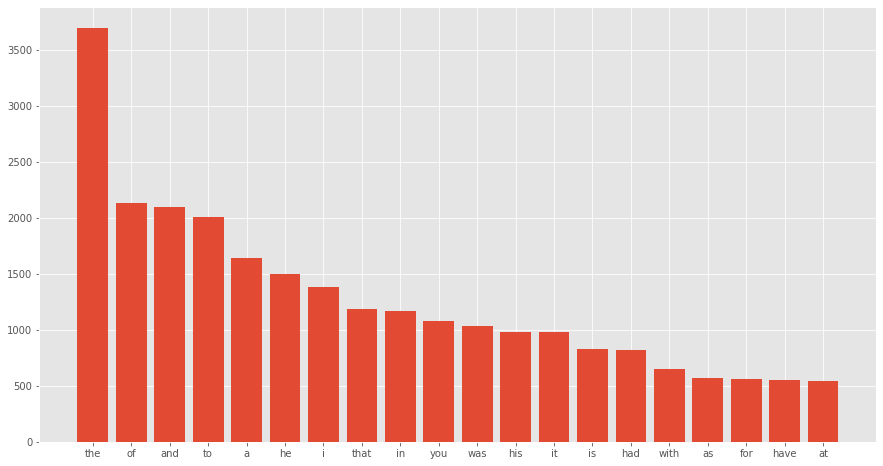

In [11]:
plt.bar([val[0] for val in top20],[val[1] for val in top20])

In [12]:
pos_dorian = nltk.pos_tag(wordFreq.keys())

In [13]:
pos_dorian[:10]

[('the', 'DT'),
 ('studio', 'NN'),
 ('was', 'VBD'),
 ('filled', 'VBN'),
 ('with', 'IN'),
 ('rich', 'JJ'),
 ('odour', 'NN'),
 ('of', 'IN'),
 ('roses,', 'NN'),
 ('and', 'CC')]

In [14]:
adj = {}
for tag in pos_dorian:
    if tag[1]!='JJ':
        continue
    adj[tag[0]] = wordFreq[tag[0]]

In [15]:
sort_adj = sorted(adj.items(), key=lambda x: x[1], reverse=True)

In [16]:
top20 = sort_adj[:20]

<BarContainer object of 20 artists>

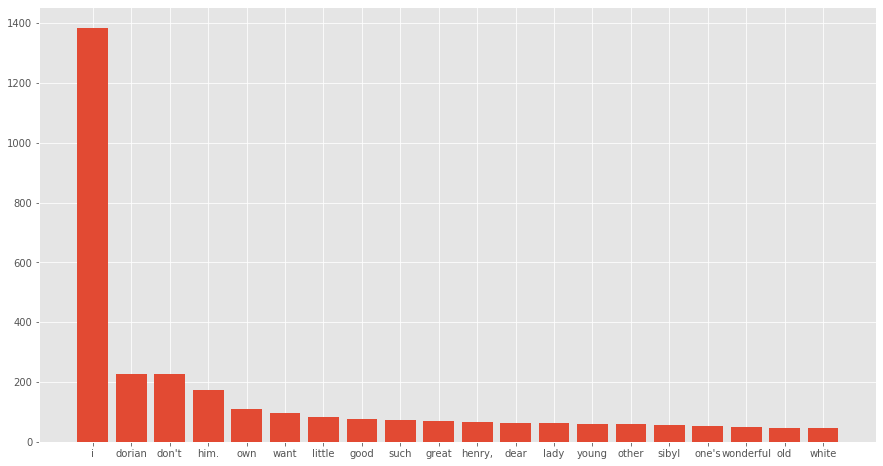

In [17]:
plt.bar([val[0] for val in top20],[val[1] for val in top20])

In [21]:
def first20(path,pos = 'JJ'):
    """
    Take 20 most ocuured words of any of
    parts of speech inn a novel and plot it.
    Default parts of speech is Adjective
    """
    file = open(path,'r').read().splitlines()
    novel = []
    for item in file:
        if item=='' or 'CHAPTER' in item:
            continue
        for word in item.split(' '):
            if len(word)>0:
                if word[-1]=='.' or word[-1]==',':
                    novel.append(word[:-1])
                else:
                    novel.append(word)
                
                
    uniqWord = {}
    
    for word in novel:
        uniqWord[word] = 1
        
    freq = nltk.FreqDist(novel)
    pos_novel = nltk.pos_tag(uniqWord.keys())
    
    dic = {}
    for tag in pos_novel:
        if tag[1]!=pos:
            continue
        dic[tag[0]] = freq[tag[0]]
        
    sort_dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    f20 = sort_dic[:20]
    plt.bar([val[0] for val in f20],[val[1] for val in f20])
    
    

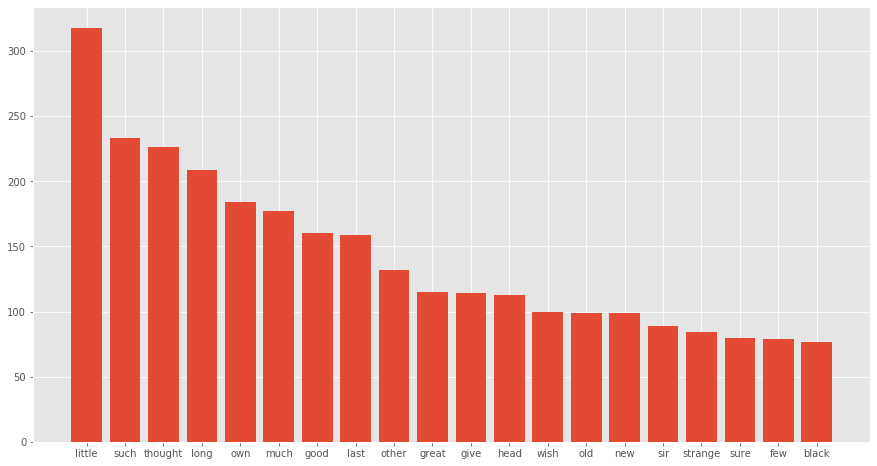

In [22]:
#top 20 adjectives in jane eyre 
first20('txt/janeeyre.txt')

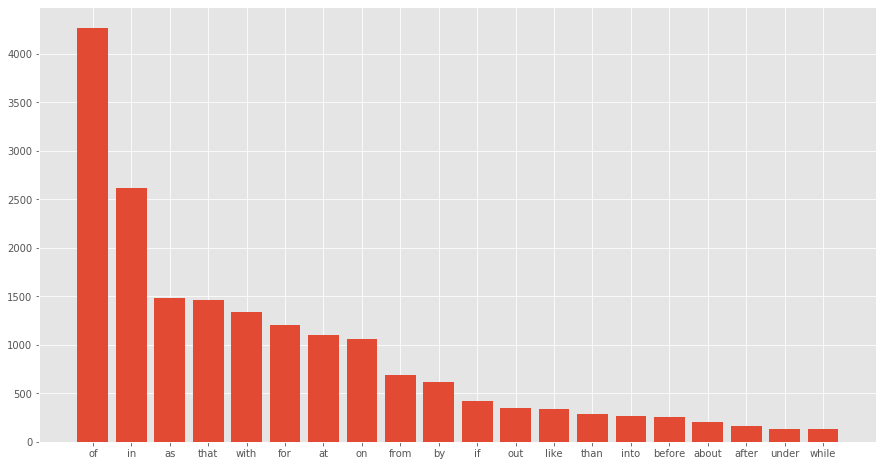

In [23]:
#top 20 conjunctions in jane eyre 
first20('txt/janeeyre.txt',pos = 'IN')